In [1]:
## Importing packages

library(tidyr)
library(ggplot2)
library(dplyr)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Reading the dataset
chess<- read.csv("games.csv")

In [3]:
head(chess,2)

id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
TZJHLljE,FALSE,1.50421e+12,1.50421e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,TRUE,1.50413e+12,1.50413e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+,B00,Nimzowitsch Defense: Kennedy Variation,4


In [4]:
class(chess)

[1] "data.frame"

In [5]:
typeof(chess)

[1] "list"

In [6]:
#finding row and coumns
dim(chess)

[1] 20058    16

In [7]:
# Size of dataset
object.size(chess)

10331096 bytes

In [8]:
#Quick overview of datset
summary(chess)


        id          rated        created_at         last_move_at      
 XRuQPSzH:    5   False:2048   Min.   :1.377e+12   Min.   :1.377e+12  
 0gTDO6Av:    4   FALSE:1855   1st Qu.:1.478e+12   1st Qu.:1.478e+12  
 1b0kpInt:    4   True :8723   Median :1.496e+12   Median :1.496e+12  
 CvakmVNb:    4   TRUE :7432   Mean   :1.484e+12   Mean   :1.484e+12  
 CxQlHSnq:    4                3rd Qu.:1.503e+12   3rd Qu.:1.503e+12  
 dFQ5D7CS:    4                Max.   :1.504e+12   Max.   :1.504e+12  
 (Other) :20033                                                       
     turns          victory_status    winner      increment_code
 Min.   :  1.00   draw     :  906   black: 9107   10+0   :7721  
 1st Qu.: 37.00   mate     : 6325   draw :  950   15+0   :1311  
 Median : 55.00   outoftime: 1680   white:10001   15+15  : 850  
 Mean   : 60.47   resign   :11147                 5+5    : 738  
 3rd Qu.: 79.00                                   5+8    : 697  
 Max.   :349.00                           

In [9]:
# Structure of data
str(chess)

'data.frame':	20058 obs. of  16 variables:
 $ id            : Factor w/ 19113 levels "005lW0Xz","009mKOEz",..: 15433 10012 10832 9930 3074 11034 13555 14110 5539 3341 ...
 $ rated         : Factor w/ 4 levels "False","FALSE",..: 2 4 4 4 4 2 4 2 4 4 ...
 $ created_at    : num  1.5e+12 1.5e+12 1.5e+12 1.5e+12 1.5e+12 ...
 $ last_move_at  : num  1.5e+12 1.5e+12 1.5e+12 1.5e+12 1.5e+12 ...
 $ turns         : int  13 16 61 61 95 5 33 9 66 119 ...
 $ victory_status: Factor w/ 4 levels "draw","mate",..: 3 4 2 2 2 1 4 4 4 2 ...
 $ winner        : Factor w/ 3 levels "black","draw",..: 3 1 3 3 3 2 3 1 1 3 ...
 $ increment_code: Factor w/ 400 levels "0+12","0+13",..: 111 299 299 188 248 20 20 115 103 20 ...
 $ white_id      : Factor w/ 9438 levels "--jim--","-l-_jedi_knight_-l-",..: 1288 17 3824 2018 6058 8569 1468 2023 2526 2023 ...
 $ white_rating  : int  1500 1322 1496 1439 1523 1250 1520 1413 1439 1381 ...
 $ black_id      : Factor w/ 9331 levels "-0olo0-","-l-_jedi_knight_-l-",..: 12 7749 12

In [10]:
#finding null values in data
sum(is.na(chess))

[1] 0

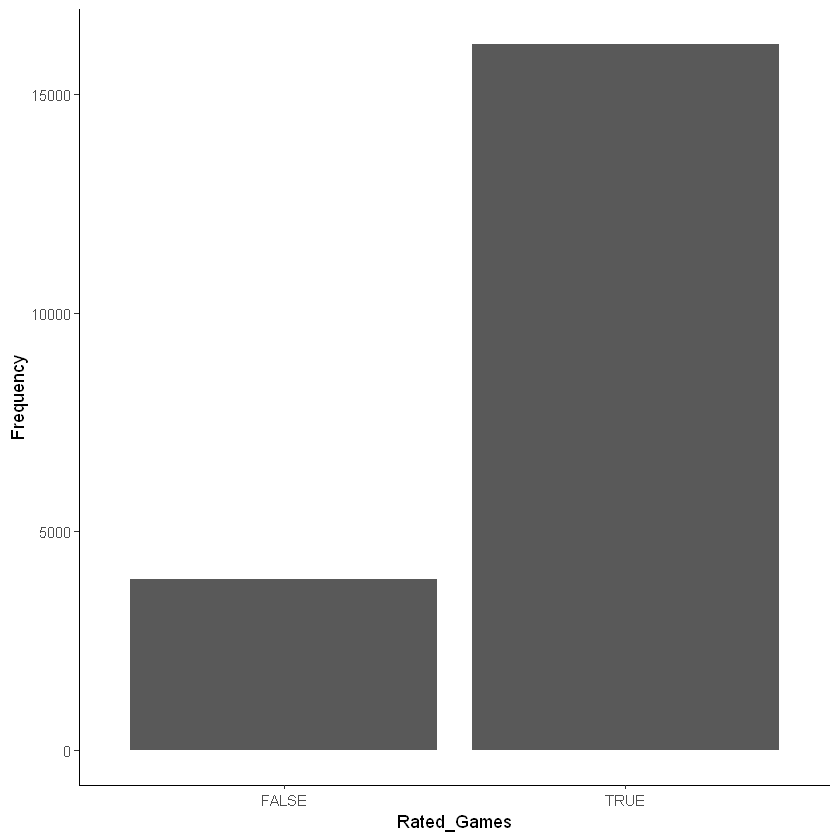

In [11]:
#In lichess.com mostly players play rating games

ggplot(chess,aes(x=toupper(rated)))+geom_bar()+xlab(label = "Rated_Games")+ylab(label = "Frequency")+theme_classic()

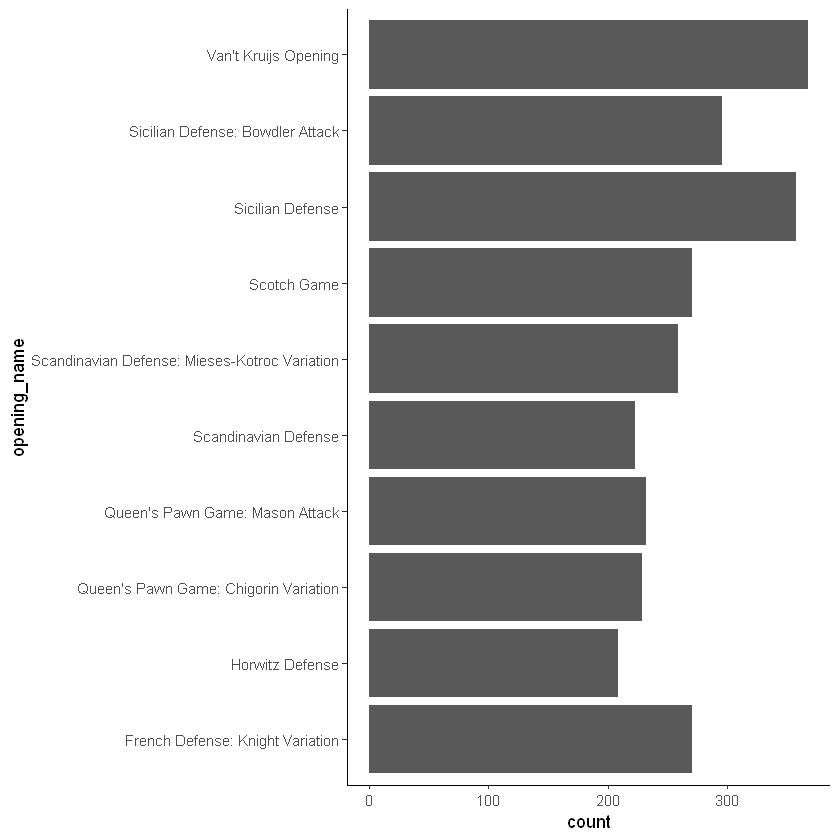

In [12]:
#top 10 openings
opening<-filter(summarise(group_by(chess,opening_name), count=length(opening_name)),count>200)

ggplot(opening,aes(x=opening_name,y=count))+geom_col()+coord_flip()+theme_classic()

In [13]:
#top 10 opening moves
open_move<-head(arrange(summarise(group_by(filter(chess,winner=="white"),opening_eco),count=length(opening_eco)),desc(count)),10)
open_move

opening_eco,count
C00,417
A00,398
C41,396
B00,365
B01,358
D00,341
A40,338
C20,299
C40,266
C50,240


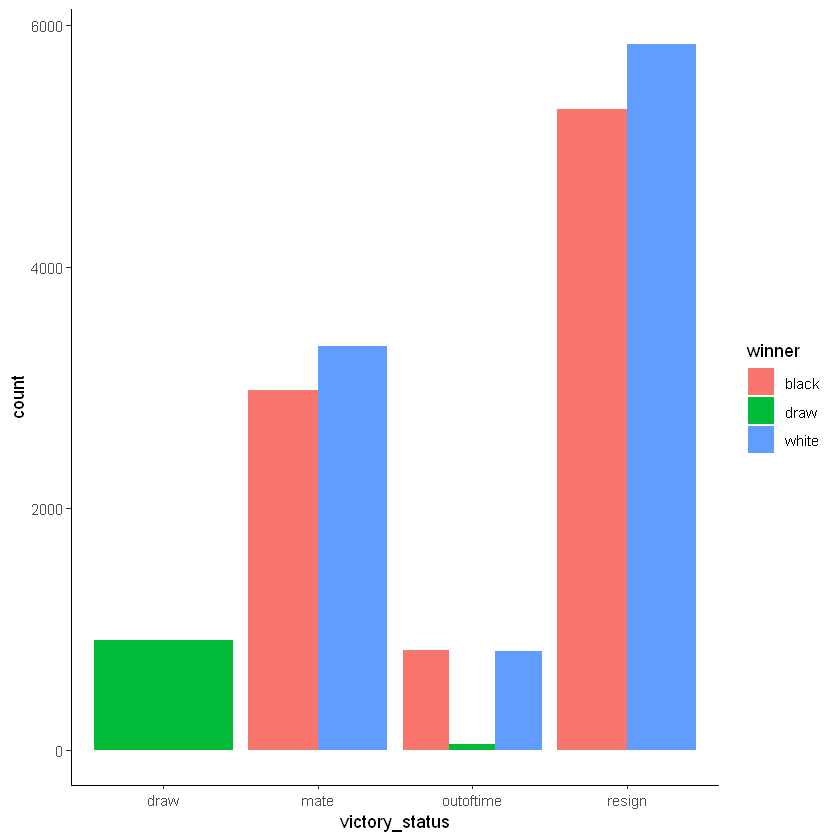

In [14]:
#types of wins either by black or white
ggplot(chess,aes(x=victory_status,fill=winner))+geom_bar(position = "dodge")+theme_classic()

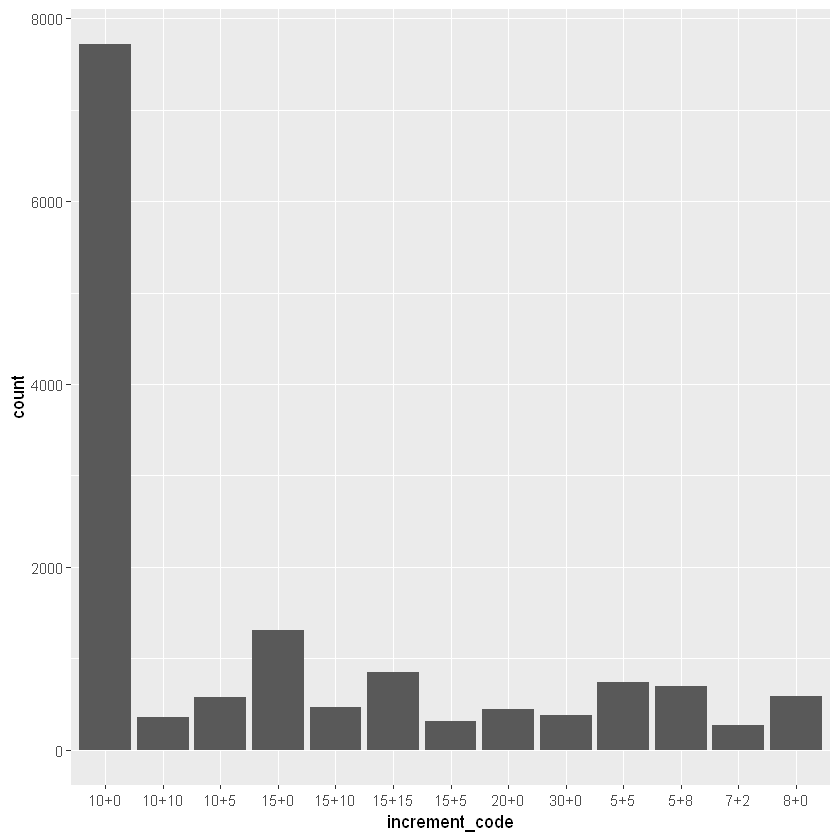

In [15]:
# 10+0 increment is most often played
increment<-filter(summarise(group_by(chess,increment_code), count=length(increment_code)),count>200)
ggplot(increment,aes(x=increment_code,y=count))+geom_col()

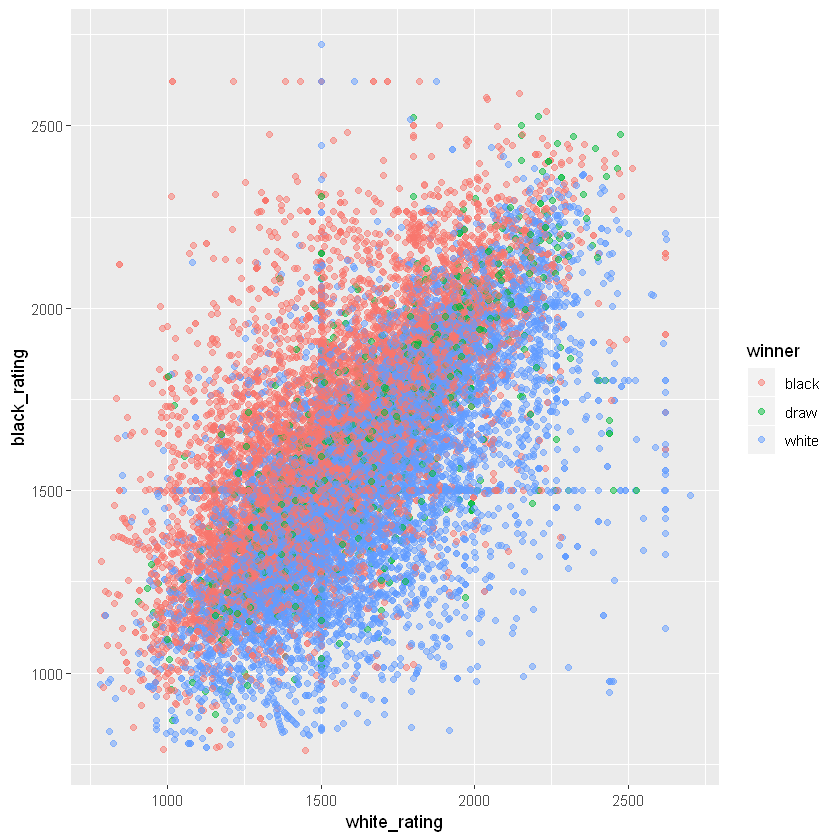

In [16]:
# range of player's rating
ggplot(chess,aes(x=white_rating,y=black_rating,color=winner))+geom_point(alpha=0.5)

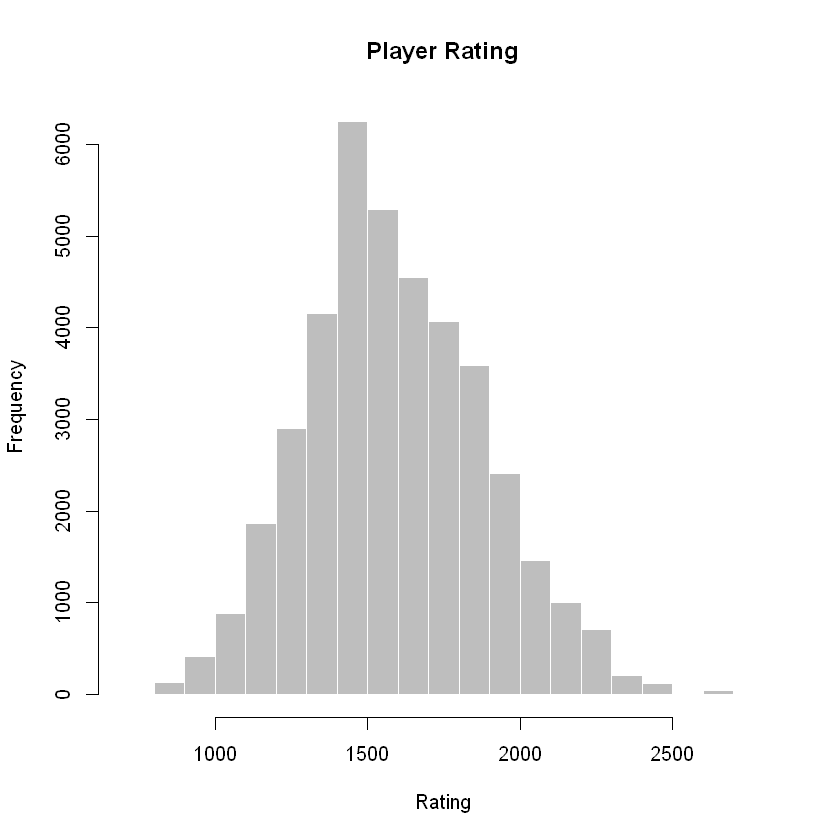

In [17]:
#checking player rating 
rating<-rbind(chess$white_rating,chess$black_rating)

hist(rating,angle = 45, col = "grey", border = "white", main = "Player Rating", xlab = "Rating")

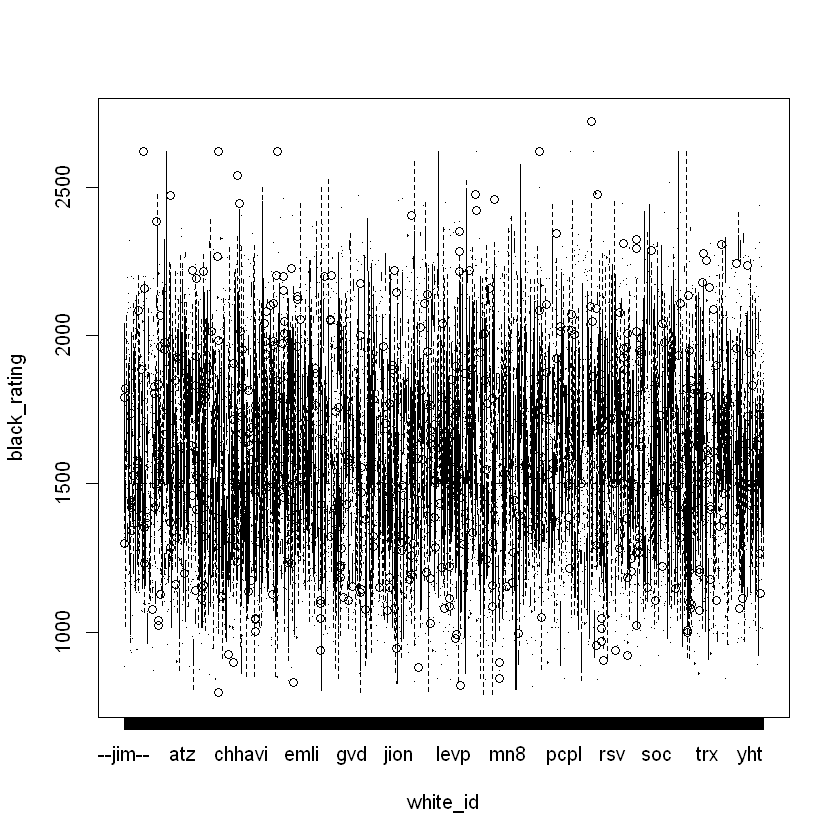

In [18]:
# checking rating with using Id in box plot
boxplot(chess$black_rating ~ chess$white_id, xlab = "white_id", ylab = "black_rating", col = c("red"))

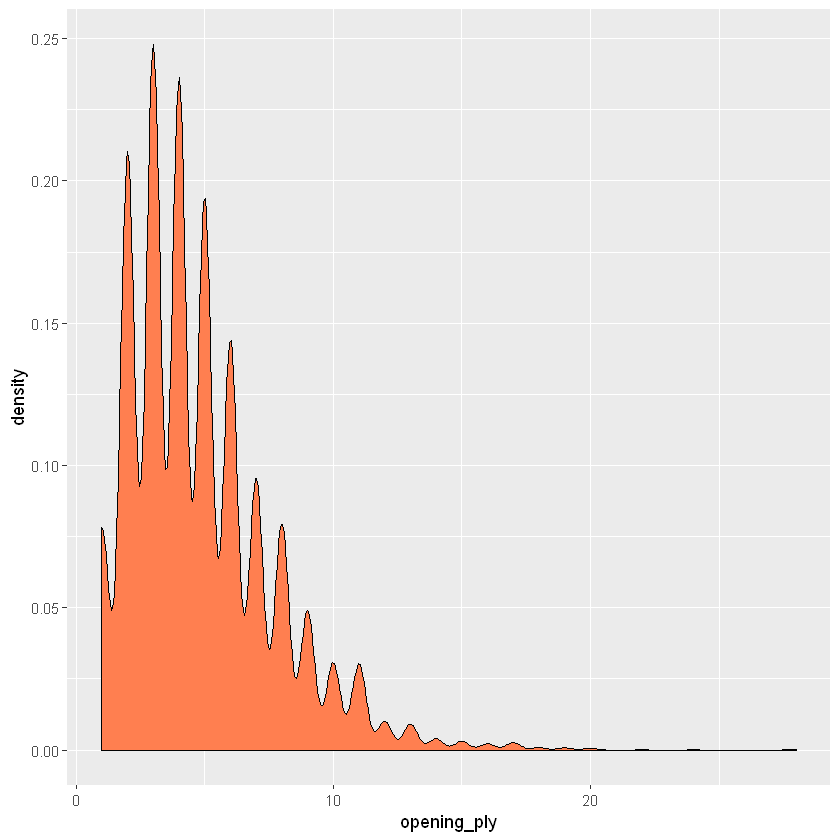

In [19]:
# opening_ply Density

ggplot(chess, aes(x = opening_ply)) + geom_density(fill = "coral")